In [10]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error

### Programa para crear DF a partir de BBDD de MySQL

In [11]:
def cargar_tablas_a_dataframes(host, database, user, password):
    """
    Se conecta a una base de datos MySQL y carga todas las tablas como DataFrames de Pandas
    con nombres dinámicos en el entorno global (ej. df_nombreTabla).
    """
    try:
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        if connection.is_connected():
            cursor = connection.cursor()  # Creación de un cursor para ejecutar consultas SQL
            cursor.execute("SHOW TABLES")  # Se ejecuta la consulta "SHOW TABLES" para listar las tablas

            tablas = [tabla[0] for tabla in cursor.fetchall()]  # Se obtienen los nombres de las tablas

            for tabla in tablas:
                cursor.execute(f"SELECT * FROM {tabla}")  # Se extraen los datos de cada tabla
                columnas = [columna[0] for columna in cursor.description]  # Nombres de columnas
                globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)  # DataFrame dinámico
                print(f'df_{tabla}')  # Mostrar el nombre del DataFrame creado

    except Error as e:
        print("Error while connecting to MySQL:", e)  # Manejo de errores

    finally:
        if 'connection' in locals() and connection.is_connected():
            cursor.close()  # Cierra el cursor
            connection.close()  # Cierra la conexión
            print("MySQL connection is closed")  # Mensaje de cierre

### Llamar a la funcion para crear el DF

In [12]:
cargar_tablas_a_dataframes('212.227.90.6', 'Equip_11', 'Equipo11', 'E1q2u3i4p5o11')

df_RRHH
MySQL connection is closed


### Codigo para que se vean todas las columnas

In [13]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: muestra todo el ancho (evita recortes por pantalla estrecha)
pd.set_option('display.width', None)

# Opcional: ajusta el ancho máximo de cada columna si es muy largo
pd.set_option('display.max_colwidth', None)

### Crear DF filtrando los que tengan 0 horas de absentismo

In [14]:
df_absentismo = df_RRHH[df_RRHH['Absenteeism_hours'] > 0]

### Ver tabla

In [20]:
df_absentismo.head()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Mes_nombre,Estacion_nombre
0,14,11,11,2,2,155,12,14,34,"284,031",97,0,1,2,1,0,0,95,196,25,120,noviembre,otoño
1,36,13,4,4,4,118,13,18,50,"239,409",98,0,1,1,1,0,0,98,178,31,120,abril,primavera
2,9,6,7,3,1,228,14,16,58,"264,604",93,0,1,2,0,0,1,65,172,22,120,julio,verano
3,28,9,7,3,1,225,26,9,28,"230,290",92,0,1,1,0,0,2,69,169,24,112,julio,verano
4,9,12,3,3,4,228,14,16,58,"222,196",99,0,1,2,0,0,1,65,172,22,112,marzo,primavera


### Crear un diccionario para convertir el numero del mes a nombre

In [19]:
meses = {
    1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril',
    5: 'mayo', 6: 'junio', 7: 'julio', 8: 'agosto',
    9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
}

### Hacer grafico de absentismo por horas/mes

C:\Users\santy\AppData\Local\Temp\ipykernel_39816\551390814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absentismo['Mes_nombre'] = df_absentismo['Month_absence'].map(meses)


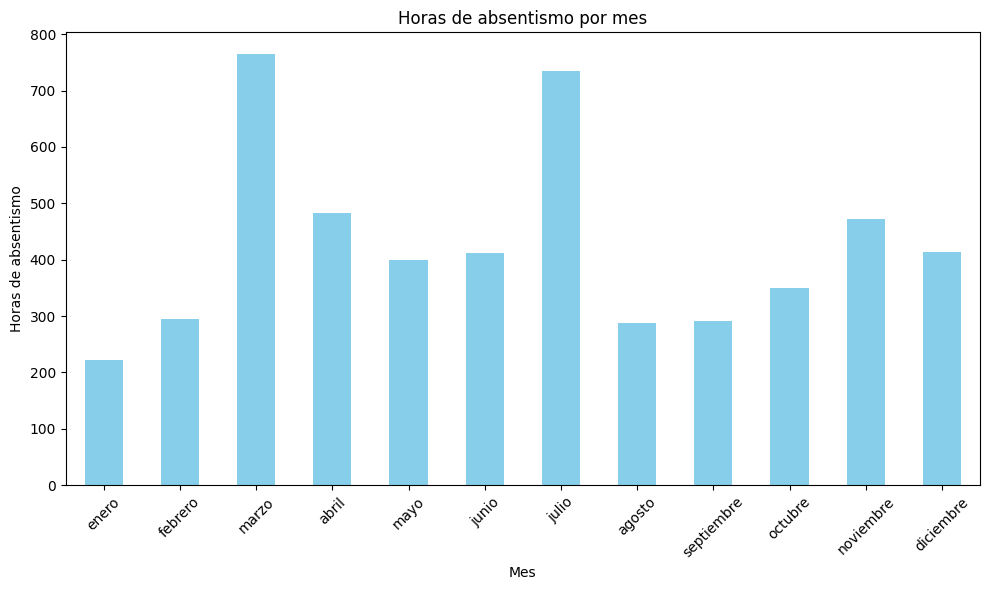

In [16]:
df_absentismo['Mes_nombre'] = df_absentismo['Month_absence'].map(meses)

df_horas_mes = df_absentismo.groupby('Mes_nombre')['Absenteeism_hours'].sum().reindex(meses.values())

df_horas_mes.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Horas de absentismo por mes')
plt.xlabel('Mes')
plt.ylabel('Horas de absentismo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Crear un diccionario para convertir el numero de la estacion a nombre

In [17]:
estaciones = {
    1: 'verano',
    2: 'otoño',
    3: 'invierno',
    4: 'primavera'
}

### Hacer grafico de absentismo por horas/mes

C:\Users\santy\AppData\Local\Temp\ipykernel_39816\1121388322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absentismo['Estacion_nombre'] = df_absentismo['Seasons'].map(estaciones)


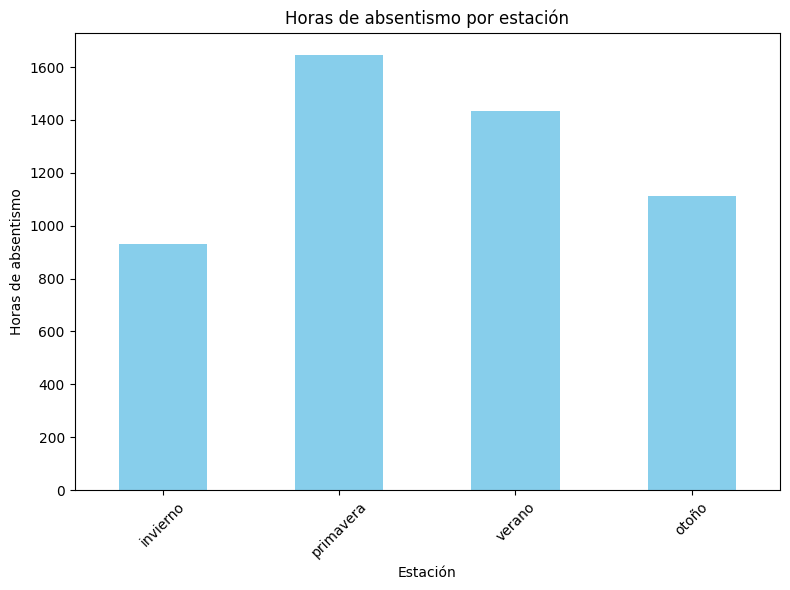

In [18]:
df_absentismo['Estacion_nombre'] = df_absentismo['Seasons'].map(estaciones)

df_horas_estacion = df_absentismo.groupby('Estacion_nombre')['Absenteeism_hours'].sum().reindex(['invierno', 'primavera', 'verano', 'otoño'])

df_horas_estacion.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Horas de absentismo por estación')
plt.xlabel('Estación')
plt.ylabel('Horas de absentismo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()